In [428]:
import tweepy
import pandas as pd
import configparser
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [429]:
config = configparser.ConfigParser()
config.read("config.ini")

['config.ini']

In [430]:
api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"]
access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

In [431]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [432]:
#posts = tweepy.Cursor(api.user_timeline, screen_name="ArvindKejriwal", count = 200, tweet_mode="extended").items((300))

In [433]:
posts = tweepy.Cursor(api.search_tweets, q="#bitcoin", count = 200, lang ="en", tweet_mode="extended").items((800))

In [434]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [435]:
df

,Tweets
0,RT @BTC_TradingLab: (2/4) #Bitcoin - S3 - BULL...
1,"RT @metabit_: 🚨TIF?\n$ 5,000 prize for anyone ..."
2,RT @KevinSvenson_: Shorts Massacred 🩸 \n\nTime...
3,RT @HowtoearnBTC: Star Bets Casino - Gamble to...
4,@JDVance1 When BlueSparrow take a handful and ...
...,...
795,RT @limitstream: $50 #bitcoin in 24 hours!\n\n...
796,RT @ImZiaulHaque: If #bitcoin manages to stay ...
797,RT @ShibaZuna: Here's a glimpse of our Nft Gam...
798,RT @intocryptoverse: If the #Bitcoin market cy...


In [436]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [437]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text)
 text = re.sub("\n","",text) # Removing hyperlink
 text = re.sub(":","",text) # Removing hyperlink
 text = emoji_pattern.sub(r'', text)
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
discard = ["CNFTGiveaway", "IVEAWAYPrizes", "Giveaway"]
df = df[~df["Tweets"].str.contains('|'.join(discard))]

In [438]:
df

,Tweets
0,_TradingLab (2/4) Bitcoin - S3 - BULL TRAP rea...
1,"_ TIF?$ 5,000 prize for anyone who can decrypt..."
2,_ Shorts Massacred Time to Bully the Bears Bi...
3,Star Bets Casino - Gamble to earn tokens.. to...
4,1 When BlueSparrow take a handful and invite a...
...,...
795,$50 bitcoin in 24 hours! Retweet &amp; follow...
796,If bitcoin manages to stay above $41k keeping...
797,Here's a glimpse of our Nft Game that we are ...
798,If the Bitcoin market cycle does officially l...


In [439]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

<ipython-input-439-d444dd8f48c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
<ipython-input-439-d444dd8f48c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['Tweets'].apply(getPolarity)


,Tweets,Subjectivity,Polarity
0,_TradingLab (2/4) Bitcoin - S3 - BULL TRAP rea...,0.50,0.0625
1,"_ TIF?$ 5,000 prize for anyone who can decrypt...",0.00,0.0000
2,_ Shorts Massacred Time to Bully the Bears Bi...,0.00,0.0000
3,Star Bets Casino - Gamble to earn tokens.. to...,0.00,0.0000
4,1 When BlueSparrow take a handful and invite a...,0.55,0.5750
...,...,...,...
795,$50 bitcoin in 24 hours! Retweet &amp; follow...,0.00,0.0000
796,If bitcoin manages to stay above $41k keeping...,0.32,0.0800
797,Here's a glimpse of our Nft Game that we are ...,0.40,-0.4000
798,If the Bitcoin market cycle does officially l...,0.00,0.0000


In [440]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

<ipython-input-440-5984e99df0d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Polarity'].apply(getAnalysis)


,Tweets,Subjectivity,Polarity,Analysis
0,_TradingLab (2/4) Bitcoin - S3 - BULL TRAP rea...,0.50,0.0625,Positive
1,"_ TIF?$ 5,000 prize for anyone who can decrypt...",0.00,0.0000,Neutral
2,_ Shorts Massacred Time to Bully the Bears Bi...,0.00,0.0000,Neutral
3,Star Bets Casino - Gamble to earn tokens.. to...,0.00,0.0000,Neutral
4,1 When BlueSparrow take a handful and invite a...,0.55,0.5750,Positive
...,...,...,...,...
795,$50 bitcoin in 24 hours! Retweet &amp; follow...,0.00,0.0000,Neutral
796,If bitcoin manages to stay above $41k keeping...,0.32,0.0800,Positive
797,Here's a glimpse of our Nft Game that we are ...,0.40,-0.4000,Negative
798,If the Bitcoin market cycle does officially l...,0.00,0.0000,Neutral


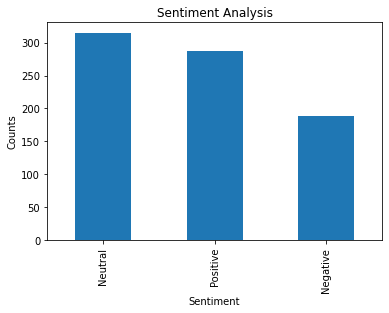

In [441]:


# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

